# Analysis of StackOverflowSurvey. Part 1

In this notebook we investigate our first question, using exploratory data analysis:

**Do data coders have more formal educational background than the other coders?**

### Import libraries and modules

In [1]:
# general packages and libraries
import os
import sys
from collections import defaultdict
import importlib

# data manipulation packages
import numpy as np
import pandas as pd
from scipy import stats

# data visualizations packages
import matplotlib.pyplot as plt
# to render plots in the notebook
%matplotlib inline

import seaborn as sns
# set a theme for seaborn
sns.set_theme()

In [2]:
# create a string for the working directory
mypath = '/home/silvia/Documents/udacityND/ml_dsnd/proj1_dsnd/'

# add src folder to sys.path to use the local modules
sys.path.insert(1, mypath + 'src')

In [3]:
# import local module containing the neccessary functions
import utils_functions as uf

# forces the interpreter to re-import the module
import importlib
importlib.reload(uf);

In [4]:
# option to display the full text of the string columns
pd.set_option('display.max_colwidth', None)

### Upload the data

In [5]:
# upload the datafiles as pandas dataframes
df1 = pd.read_csv(mypath+'data/interim/survey20_updated.csv', index_col=[0])
dfs = pd.read_csv(mypath+'data/raw/survey20_results_schema.csv')

## The data coders

Look at the subset of developers who checked at least one of the options of working with big data. These options are:

 - Data scientist or machine learning specialist  
 - Data or business analyst  
 - Engineer, data.

In [6]:
# the subset of developers that checked at least one data related profession
data_coders = df1[df1["DevClass"] == 'data_coder']
data_coders.shape

(8726, 61)

In [7]:
# the percentage of data coders among all respondents
data_coders.shape[0]/df1.shape[0] * 100

13.536867253067747

In [8]:
# the developers that did not check any data related professions
other_coders = df1[df1["DevClass"] == 'other_coder']
other_coders.shape

(55735, 61)

## Education related information
I will address now the questions I am interested in: 
> Do data developers have more formal educational background than the other developers? In particular, are there more data coders that major in math or stats than other developers? How is the education level related to job satisfaction and compensation? 

The information regarding the education can be extracted from the columns `EdLevel`, `NewEdImpt`, `UndergradMajor`. I am also interested in how these options relate to salary and job satisfaction, i.e. the columns `ConvertedComp` and `JobSat`.

## Formal education and the two classes of developers

### The education levels of data coders compared with the other coders

In [9]:
# get the question about education level
dfs[dfs.Column == 'EdLevel']['QuestionText']

14    Which of the following best describes the highest level of formal education that you’ve completed?
Name: QuestionText, dtype: object

In [10]:
# create a dataframe with percentages (computed out of data_coders or other_coders)
EdLevel_perc = uf.groupby_to_df(df1, 'DevClass', 'EdLevel', True)
# check the outcome
EdLevel_perc

,"(result, data_coder)","(result, other_coder)"
EdLevel,,
Associate degree,0.022492,0.033777
Bachelor’s degree,0.417667,0.469969
College study/no degree,0.092763,0.131894
Master’s degree,0.327235,0.210931
No formal education,0.007924,0.008700
Other doctoral degree,0.075865,0.021269
Primary/elementary school,0.007458,0.017953
Professional degree,0.015150,0.013715
Secondary school,0.033446,0.091791


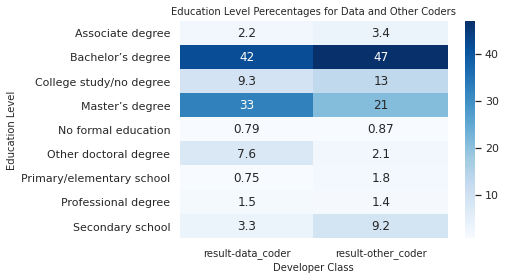

In [11]:
# plot the heatmap
sns.heatmap(EdLevel_perc.round(4)*100, cmap='Blues', annot = True);

# set labels, title, xticks properties
plt.xlabel('Developer Class', size=10)
plt.ylabel('Education Level', size=10)
plt.title('Education Level Perecentages for Data and Other Coders', size=10)
plt.xticks(size=10);

# save the plot to a file
plt.savefig(mypath + 'reports/images/edLevel_heatmap.png', 
            bbox_inches='tight', pad_inches=0.3)


#### Comments on education levels:
We observe from this heat map, that the percentages of data coders with higher education degrees (Master, Doctoral or Professional) are higher than the corresponding percentages for the other developers, in particular Master and Other Doctoral degrees. Specifically, about 42% of data coders have a higher education degree, compared to only 24.5 % for the other coders. Almost half of the other coders have a Bachelor's degree, the corresponding percentage is lower among the data coders. 

### Are there more data coders with math and stats degrees than other coders?

In [12]:
# get the question about undergraduate degree
dfs[dfs.Column == 'UndergradMajor']['QuestionText']

54    What was your primary field of study?
Name: QuestionText, dtype: object

In [13]:
# get the curated choices for the field of study
df1.UndergradMajor.unique()

array(['Computer science', nan, 'Math or stats', 'Engineering other',
       'Humanities', 'Health science', 'Information system',
       'Web dev/design', 'Natural science', 'Arts', 'No major',
       'Social science', 'Business'], dtype=object)

In [14]:
# use groupby() to get the percentage of developers with each major
UndergradMajor_perc = df1.groupby('DevClass')['UndergradMajor'].value_counts(normalize=True)
UndergradMajor_perc = UndergradMajor_perc.round(4)*100

# convert the series into a dataframe object
UndergradMajor_perc = UndergradMajor_perc.reset_index(name='perc')

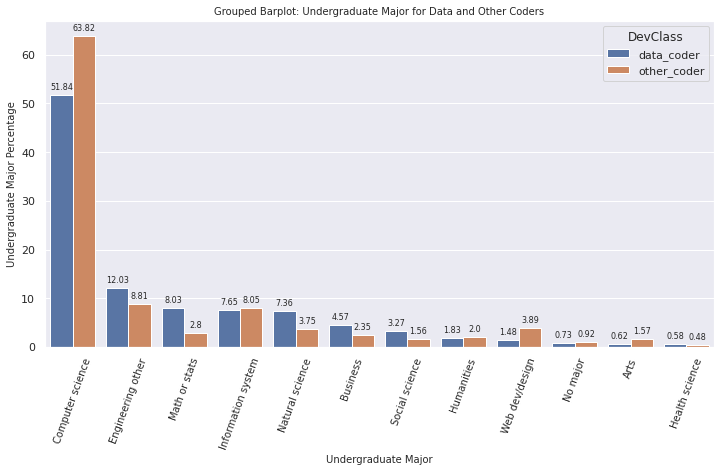

In [15]:
# set the figure size
plt.figure(figsize=(12, 6))

# create the plot
g=sns.barplot(data=UndergradMajor_perc, x='UndergradMajor',
              y='perc', hue='DevClass')

# set labels, title, xticks properties
plt.xlabel('Undergraduate Major', size=10)
plt.ylabel('Undergraduate Major Percentage', size=10)
plt.title('Grouped Barplot: Undergraduate Major for Data and Other Coders', size=10)
plt.xticks(size=10, rotation = 70);

# annotate the bars
for p in g.patches:
    g.annotate(p.get_height().round(2), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=8,
                   xytext = (0, 8), 
                   textcoords = 'offset points')
# save the plot to a file
plt.savefig(mypath + 'reports/images/undergradMajor_barplot.png', 
            bbox_inches='tight', pad_inches=.3)

#### Comments on undergraduate majors
We see from our plot that the percentages of data coders with a mathematics or statistics degree, some engineering degree (other than computer science), or a science degree (both natural and social sciences) are higher than the corresponding values for developers that do not work with big data. However, the largest gap we observe for computer science graduates who form almost 64% of the other coders, compared with 52% for the data coders.

### Importance attributed to formal education

In [16]:
# get the question about the importance of formal education
dfs[dfs.Column == 'NEWEdImpt']['QuestionText']

29    How important is a formal education, such as a university degree in computer science, to your career?
Name: QuestionText, dtype: object

In [17]:
# get the choices for the education importance question
df1.EdImpt.unique()

array(['Fairly important', nan, 'Not important', 'Very important',
       'Somewhat important', 'Critically important'], dtype=object)

In [18]:
# use groupby() to get the percentage of developers with each major
EdImpt_perc = df1.groupby('DevClass')['EdImpt'].value_counts(normalize=True)
EdImpt_perc = EdImpt_perc.round(4)*100

In [19]:
# convert the series into a dataframe object
EdImpt_perc = EdImpt_perc.reset_index(name='perc')
EdImpt_perc 

,DevClass,EdImpt,perc
0,data_coder,Very important,28.61
1,data_coder,Fairly important,24.09
2,data_coder,Somewhat important,19.28
3,data_coder,Critically important,15.26
4,data_coder,Not important,12.76
5,other_coder,Fairly important,26.57
6,other_coder,Somewhat important,24.36
7,other_coder,Very important,23.64
8,other_coder,Not important,16.74
9,other_coder,Critically important,8.69


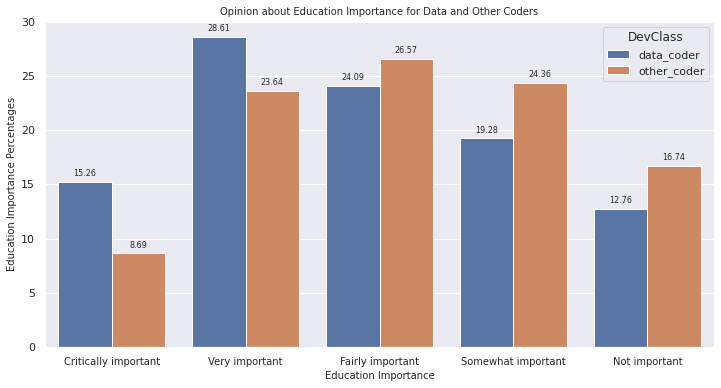

In [20]:
# set the figure size
plt.figure(figsize=(12, 6))

# create order for the bars 
opinions = ['Critically important', 'Very important', 'Fairly important', 
            'Somewhat important', 'Not important']

# create the plot
g=sns.barplot(data=EdImpt_perc, x='EdImpt', y='perc', hue='DevClass',
             order = opinions)

# set labels, title, xticks properties
plt.xlabel('Education Importance', size=10)
plt.ylabel('Education Importance Percentages', size=10)
plt.title('Opinion about Education Importance for Data and Other Coders', size=10)
plt.xticks(size=10, rotation = 0);

# annotate the bars
for p in g.patches:
    g.annotate(p.get_height().round(2), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=8,
                   xytext = (0, 8), 
                   textcoords = 'offset points')

#### Comments on the importance of formal education:
There are higher percentages of data coders who considers a formal education critically or very important to their careers. On the other side, the other coders see a formal education only fairly important. 